<a href="https://colab.research.google.com/github/fairuznajla/EcoFriendlyOnlineTaxiCompany_Analytics/blob/main/K-Means%20%26%20Hierarchical%20Clustering%20Python%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset

In [7]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
car_emissions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CO2 Emissions_Canada.csv')
car_emissions

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


# Exploratory Data Analysis (EDA)

In [9]:
car_emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
car_emissions.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [11]:
car_emissions.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4400,AUDI,A5 QUATTRO,SUBCOMPACT,2.0,4,AM7,Z,10.0,7.0,8.7,32,203
2802,JEEP,CHEROKEE TRAILHAWK 4X4,SUV - SMALL,2.4,4,A9,X,12.1,9.4,10.9,26,255
2401,CHEVROLET,CAMARO,COMPACT,3.6,6,M6,X,13.2,8.7,11.2,25,261
1681,JEEP,COMPASS 4X4 TRAIL RATED,SUV - SMALL,2.4,4,AV,X,11.7,10.3,11.1,25,255
3826,HYUNDAI,SANTA FE AWD,SUV - SMALL,3.3,6,AS6,X,13.0,9.7,11.5,25,269


In [12]:
car_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [13]:
# Dataset Shape
car_emissions.shape

(7385, 12)

Dataset terdiri dari 7385 baris dan 12 kolom

## Column Names

In [14]:
car_emissions.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [90]:
renamed_column = {
    'Vehicle Class' : 'Vehicle_Class',
    'Engine Size(L)' : 'Engine_Size',
    'Fuel Type' : 'Fuel_Type',
    'Fuel Consumption City (L/100 km)' : 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)' : 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)' : 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)' : 'Fuel_Consumption_Comb1',
    'CO2 Emissions(g/km)': 'CO2_Emissions'
}
car_emissions.rename(renamed_column, axis='columns', inplace=True)

## Descriptive Statistics

In [16]:
# Numerik
car_emissions.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_Size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel_Consumption_City,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel_Consumption_Hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel_Consumption_Comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel_Consumption_Comb1,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2_Emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


Rata-rata jumlah emisi CO2 dari mobil adalah 250 g/km

Paling tidak dibutuhkan 10L bahan bakar yang dibutuhkan mobil di kota ataupun jalan raya

In [17]:
# Kategori
car_emissions.describe(include = object).T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV 4X4,32
Vehicle_Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel_Type,7385,5,X,3637


Ada 42 merk mobil dan 2053 model mobil yang berbeda

Jenis bahan bakar yang paling banyak digunakan adalah bahan bakar X atau regular gasoline

Kelas kendaraan dibagi menjadi 16 dengan kendaraan SUV-SMALL yang paling banyak

## Correlation Analysis

In [18]:
!pip install dython
from dython.nominal import associations

In [19]:
car_emissions.corr()

<ipython-input-19-12c094e40f1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_emissions.corr()


,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
Engine_Size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel_Consumption_City,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel_Consumption_Hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel_Consumption_Comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel_Consumption_Comb1,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2_Emissions,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


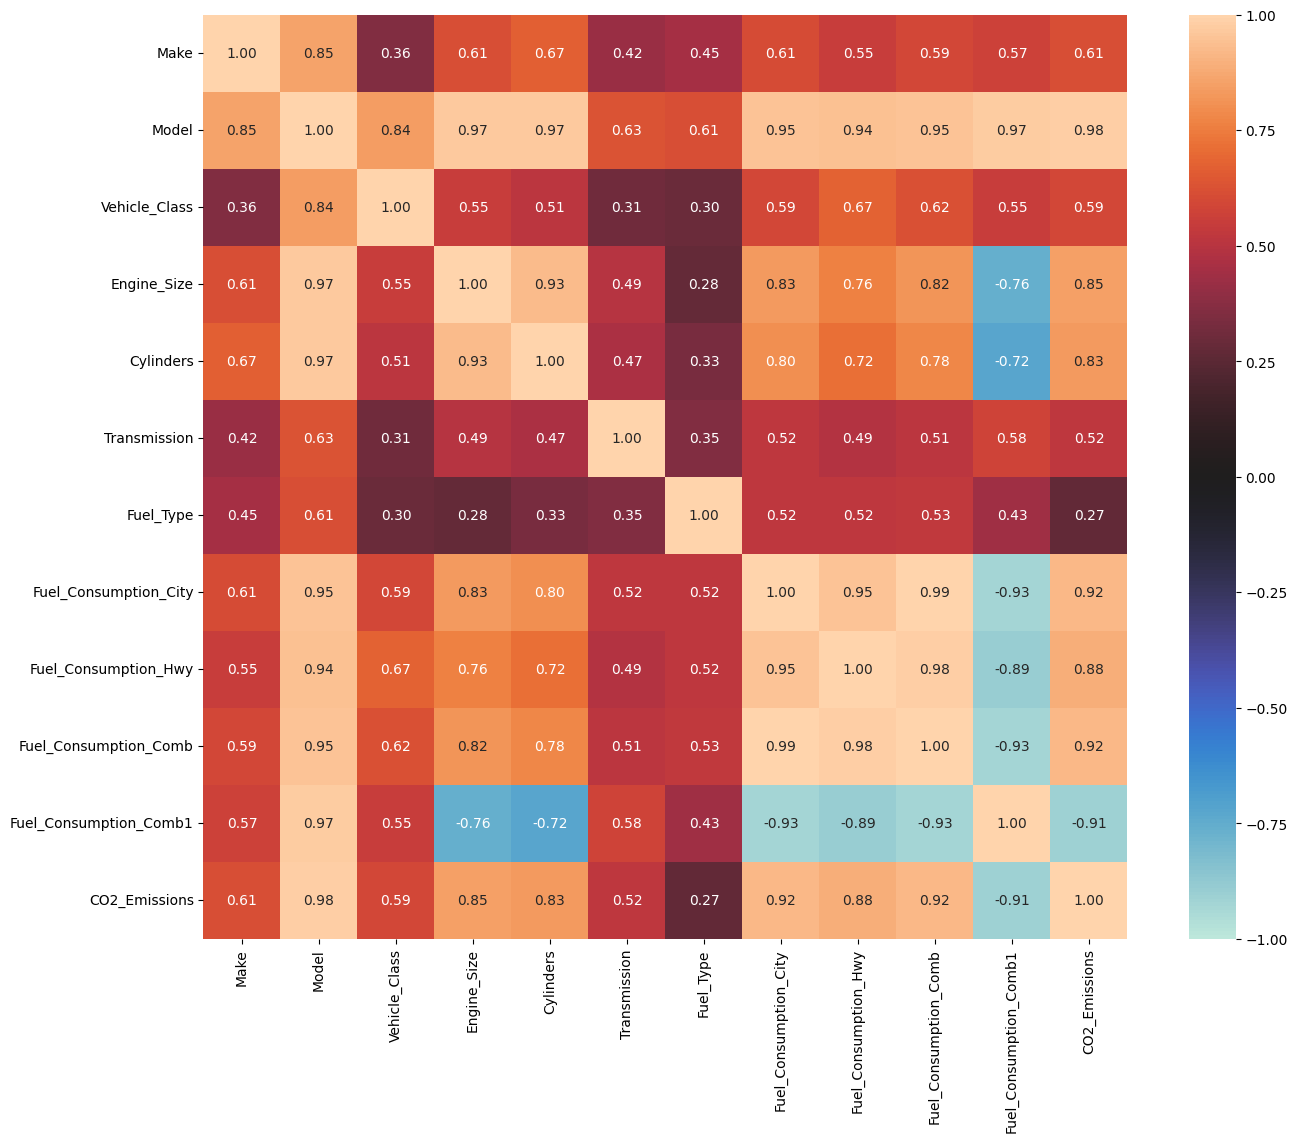

In [20]:
# Heatmap
corr = associations(car_emissions,figsize=(16,12))

- CO2 Emissions memiliki korelasi positif yang cukup tinggi (bernilai >0.6) dengan Fuel Consumption City & Highway, Model, Make, Engine Size, dan Cylinders
- CO2 Emissions memiliki korelasi negatif yang cukup tinggi (bernilai <-0.6) dengan Fuel Consumption Combination
- CO2 Emissions memiliki korelasi positif yang cukup rendah (bernilai <0.6) dengan Fuel Type, Vehicle Class, dan Transmission
- Make memiliki korelasi positif yang cukup tinggi (bernilai >0.6) dengan Engine Size, Fuel Consumption City, dan Cylinders

In [21]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
mpl.style.use(["seaborn"])

<ipython-input-21-83529265c05f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use(["seaborn"])


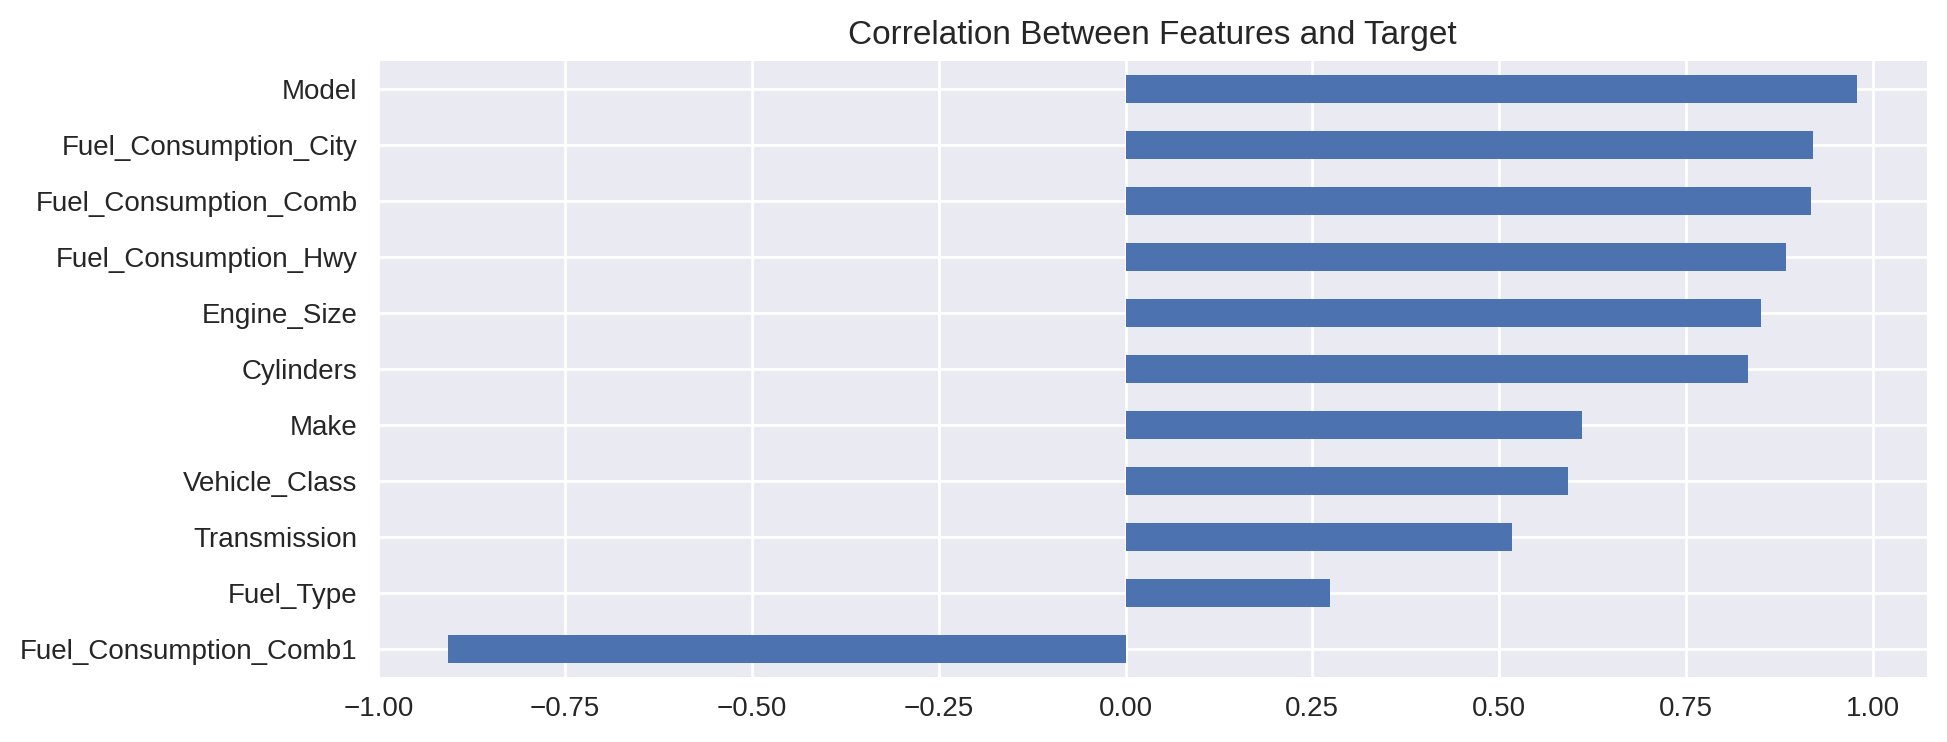

In [22]:
# Visualisasi Bar Chart Horizontal
fig = plt.figure(figsize=(10,4),dpi=200)
corr["corr"][["CO2_Emissions"]].iloc[:-1].sort_values("CO2_Emissions").plot(
    kind="barh",
    legend=None,
    title="Correlation Between Features and Target",
    ax=plt.gca()
)
plt.show()

## Histogram Plot

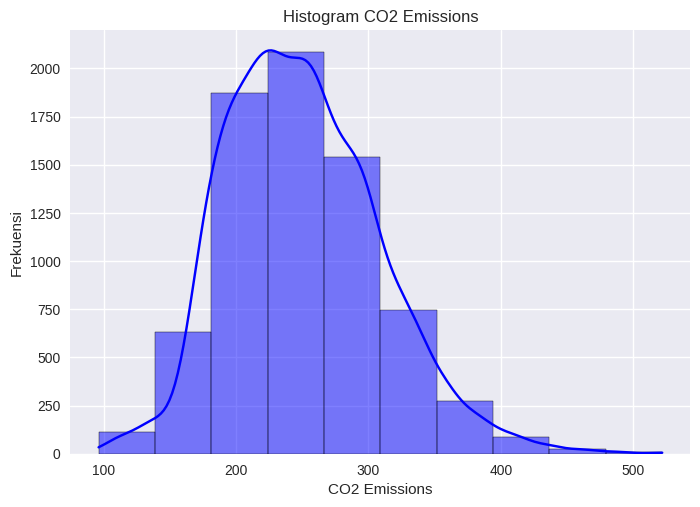

In [23]:
sns.histplot(car_emissions.CO2_Emissions, kde=True, bins=10, color='blue')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frekuensi')
plt.title('Histogram CO2 Emissions')
plt.show()

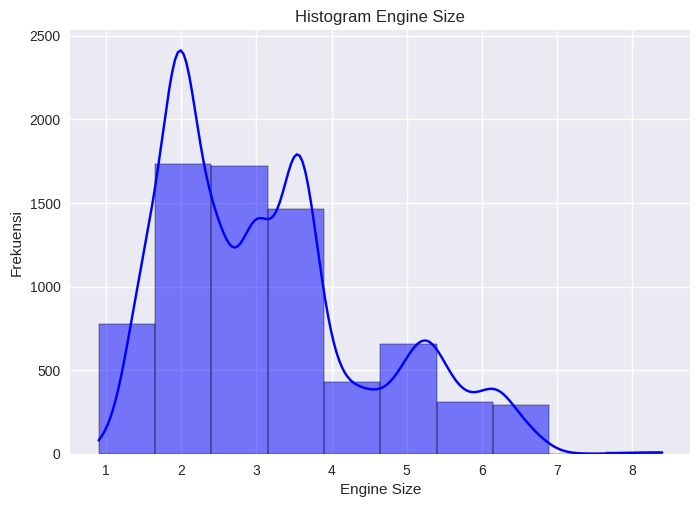

In [25]:
sns.histplot(car_emissions.Engine_Size, kde=True, bins=10, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Frekuensi')
plt.title('Histogram Engine Size')
plt.show()

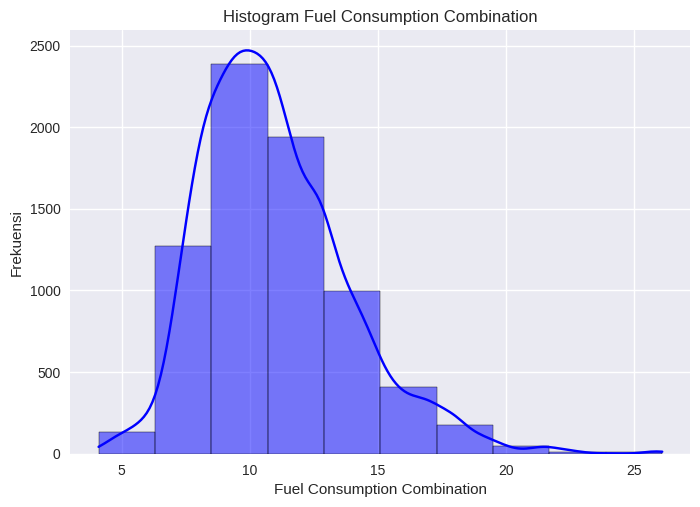

In [27]:
sns.histplot(car_emissions.Fuel_Consumption_Comb, kde=True, bins=10, color='blue')
plt.xlabel('Fuel Consumption Combination')
plt.ylabel('Frekuensi')
plt.title('Histogram Fuel Consumption Combination')
plt.show()

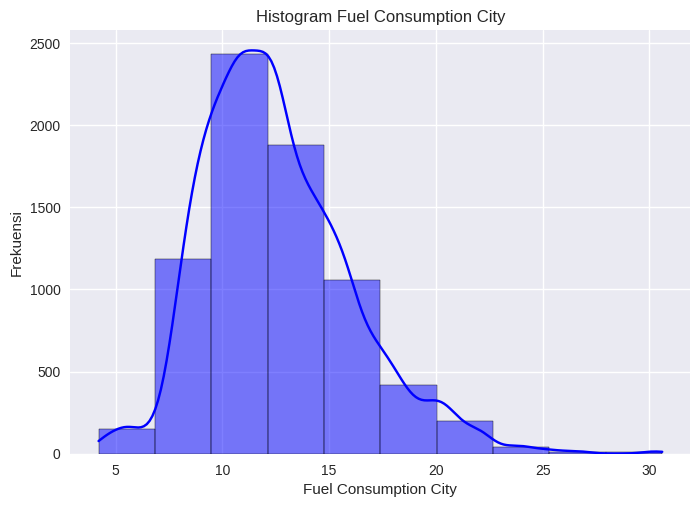

In [28]:
sns.histplot(car_emissions.Fuel_Consumption_City, kde=True, bins=10, color='blue')
plt.xlabel('Fuel Consumption City')
plt.ylabel('Frekuensi')
plt.title('Histogram Fuel Consumption City')
plt.show()

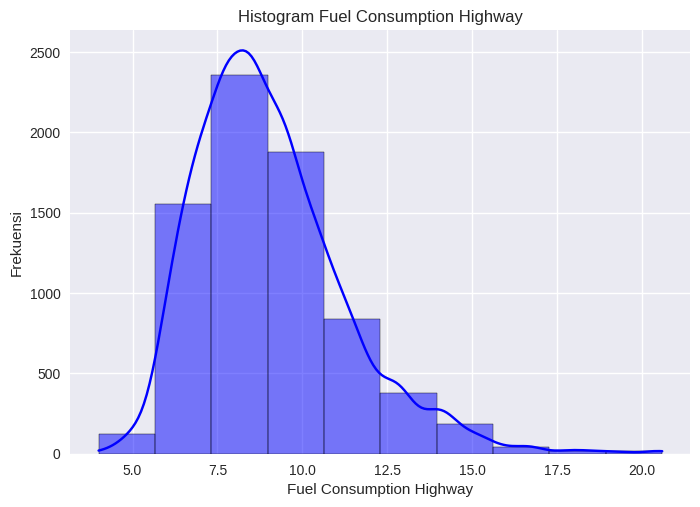

In [29]:
sns.histplot(car_emissions.Fuel_Consumption_Hwy, kde=True, bins=10, color='blue')
plt.xlabel('Fuel Consumption Highway')
plt.ylabel('Frekuensi')
plt.title('Histogram Fuel Consumption Highway')
plt.show()

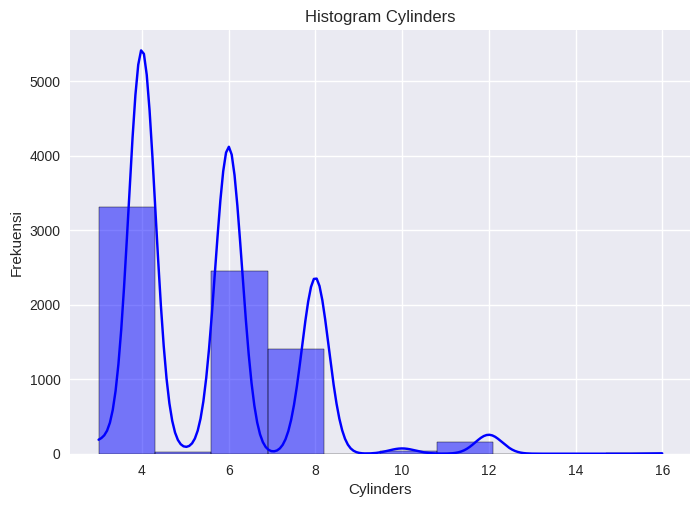

In [31]:
sns.histplot(car_emissions.Cylinders, kde=True, bins=10, color='blue')
plt.xlabel('Cylinders')
plt.ylabel('Frekuensi')
plt.title('Histogram Cylinders')
plt.show()

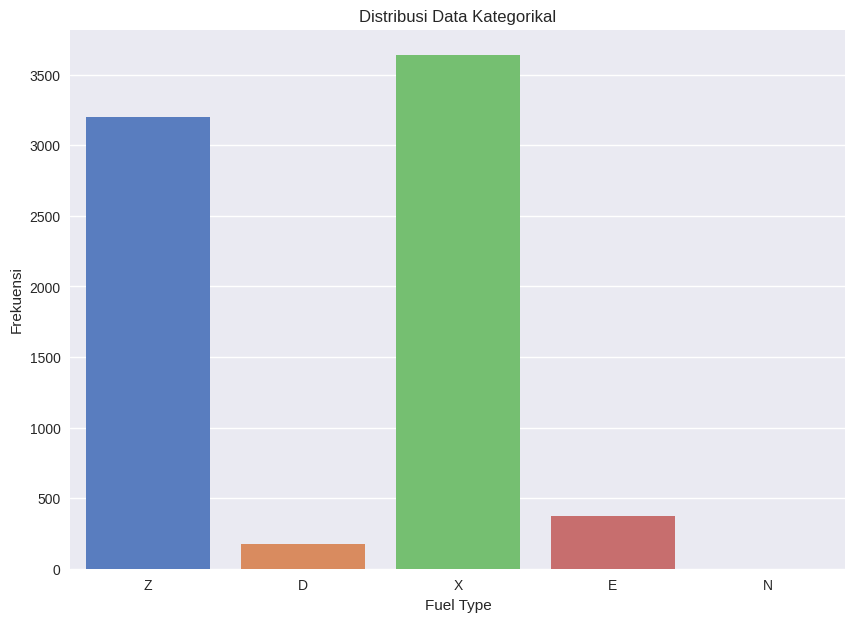

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(x='Fuel_Type', data=car_emissions, palette='muted')
plt.title('Distribusi Data Kategorikal')
plt.xlabel('Fuel Type')
plt.ylabel('Frekuensi')
plt.show()

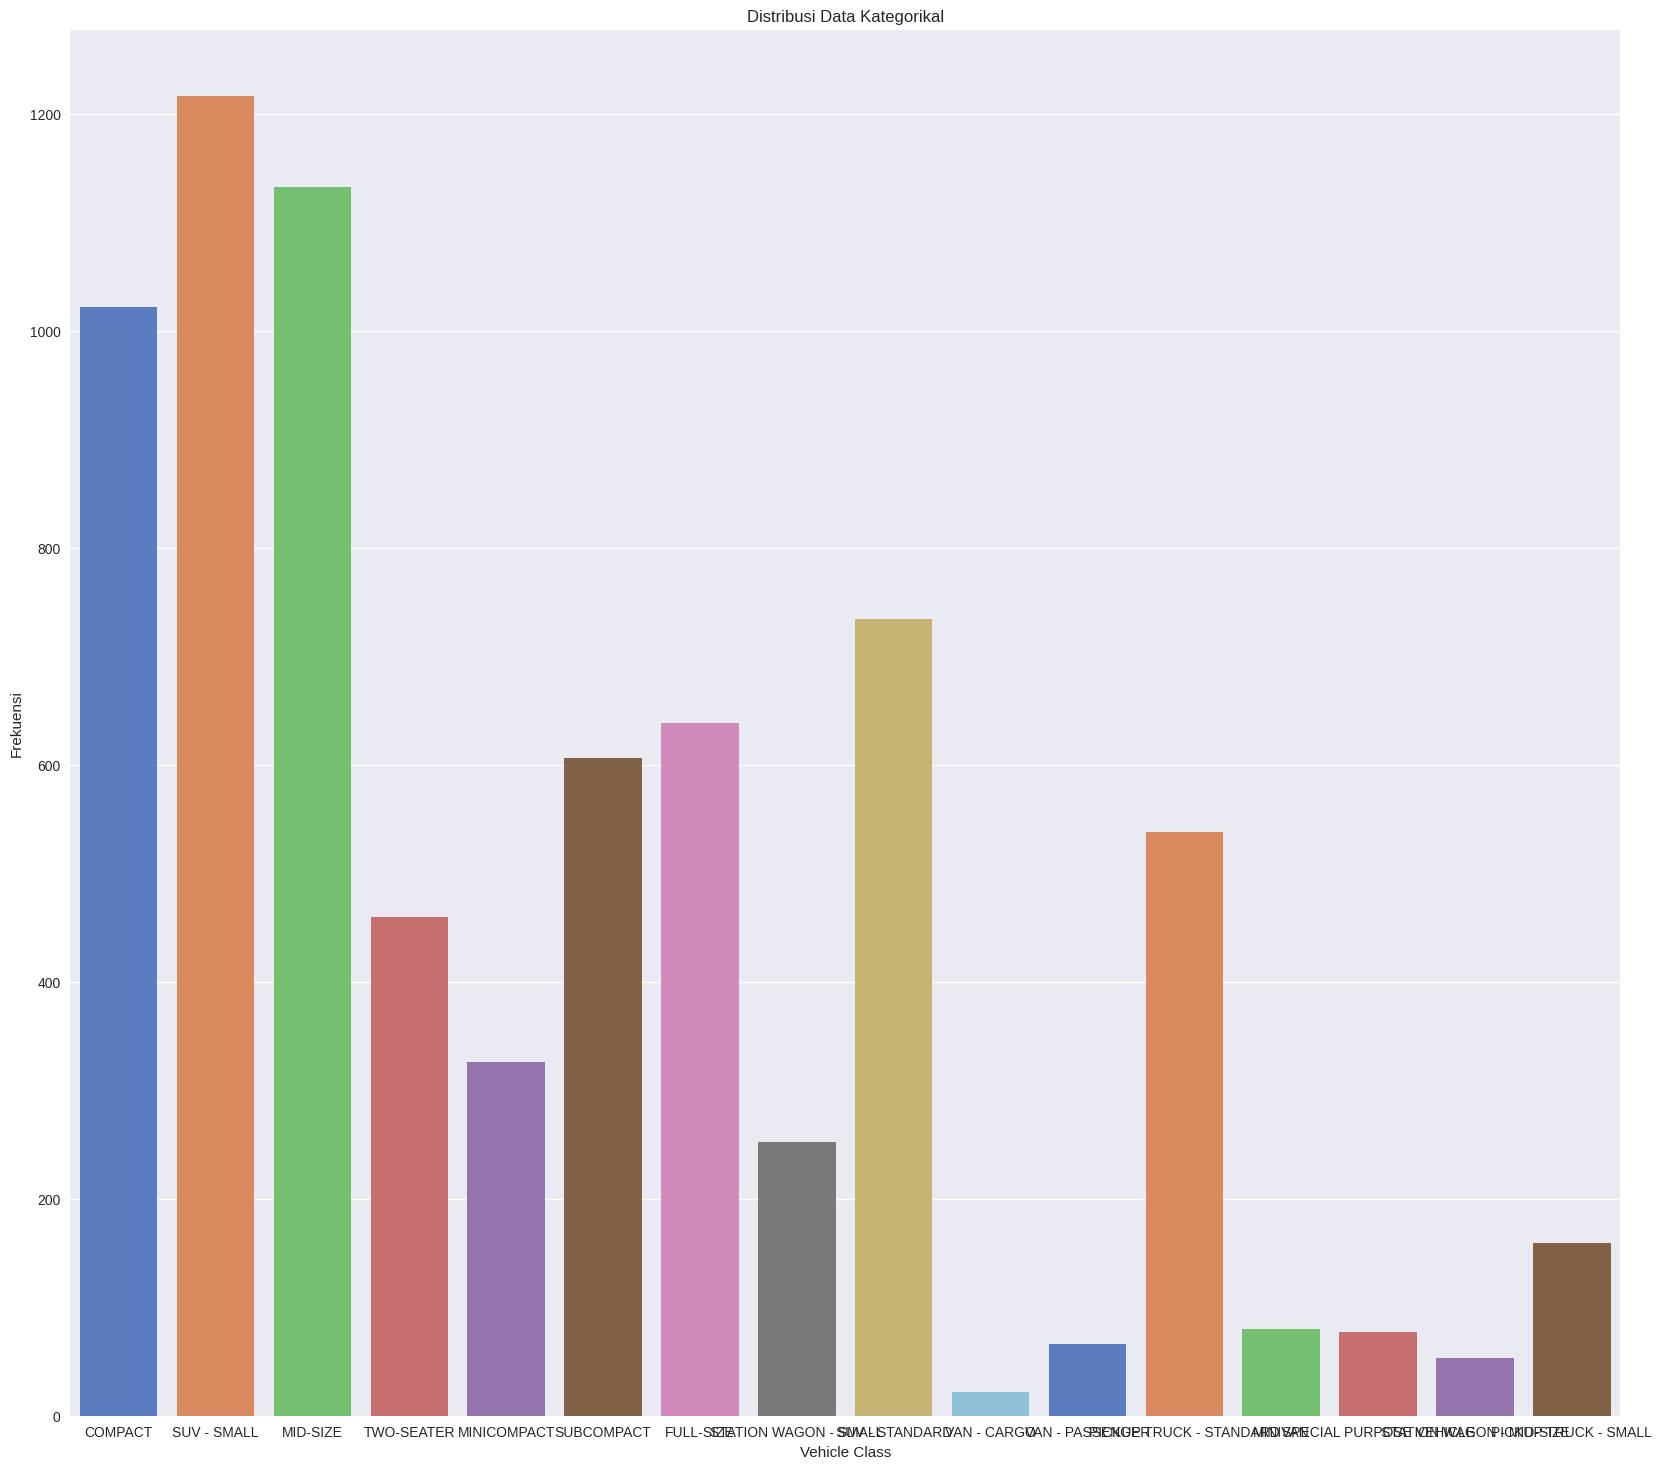

In [39]:
plt.figure(figsize=(20,18))
sns.countplot(x='Vehicle_Class', data=car_emissions, palette='muted')
plt.title('Distribusi Data Kategorikal')
plt.xlabel('Vehicle Class')
plt.ylabel('Frekuensi')
plt.show()

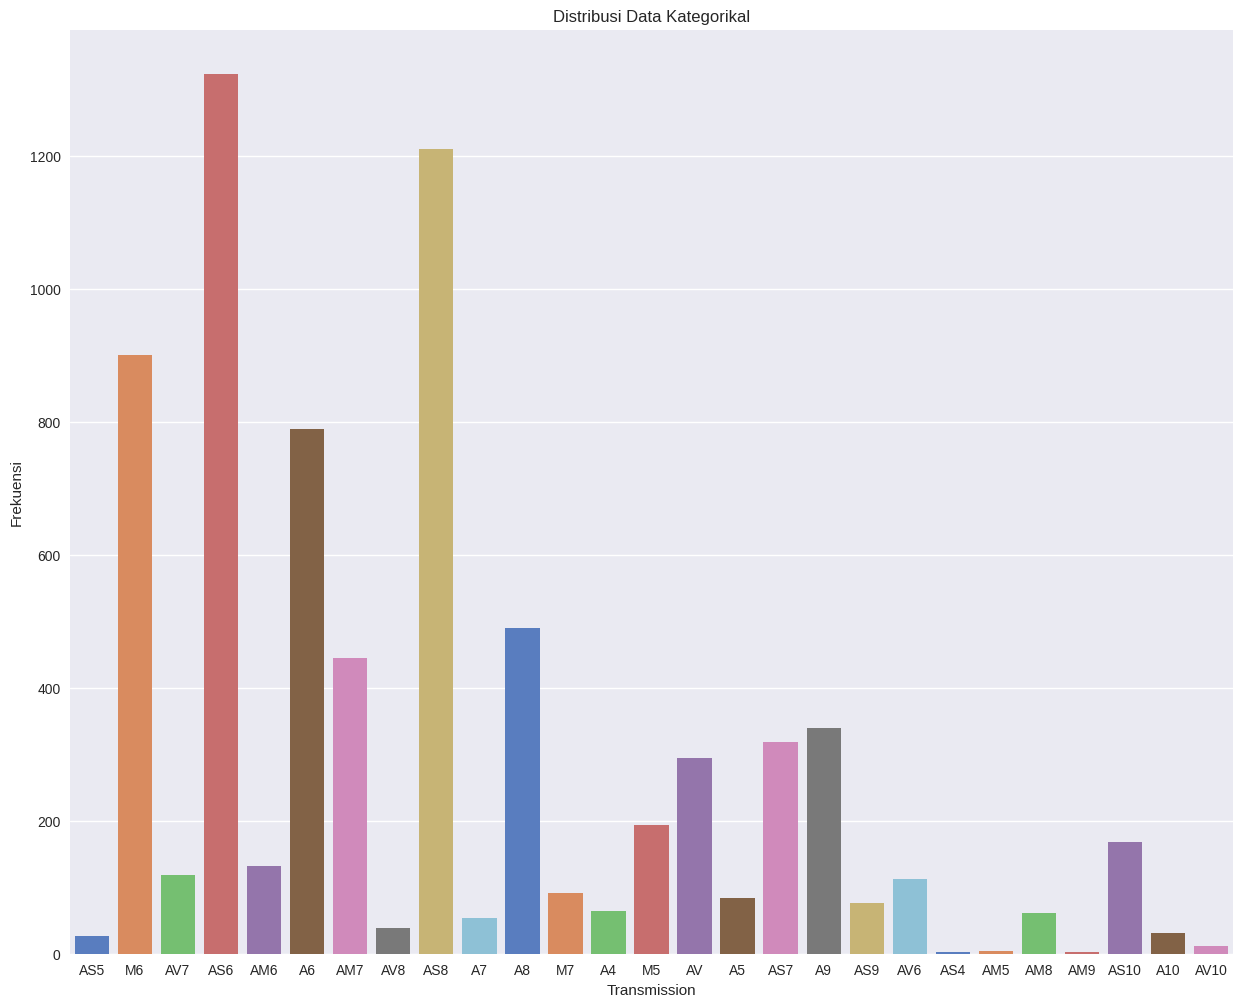

In [41]:
plt.figure(figsize=(15,12))
sns.countplot(x='Transmission', data=car_emissions, palette='muted')
plt.title('Distribusi Data Kategorikal')
plt.xlabel('Transmission')
plt.ylabel('Frekuensi')
plt.show()

## Pairplot Check

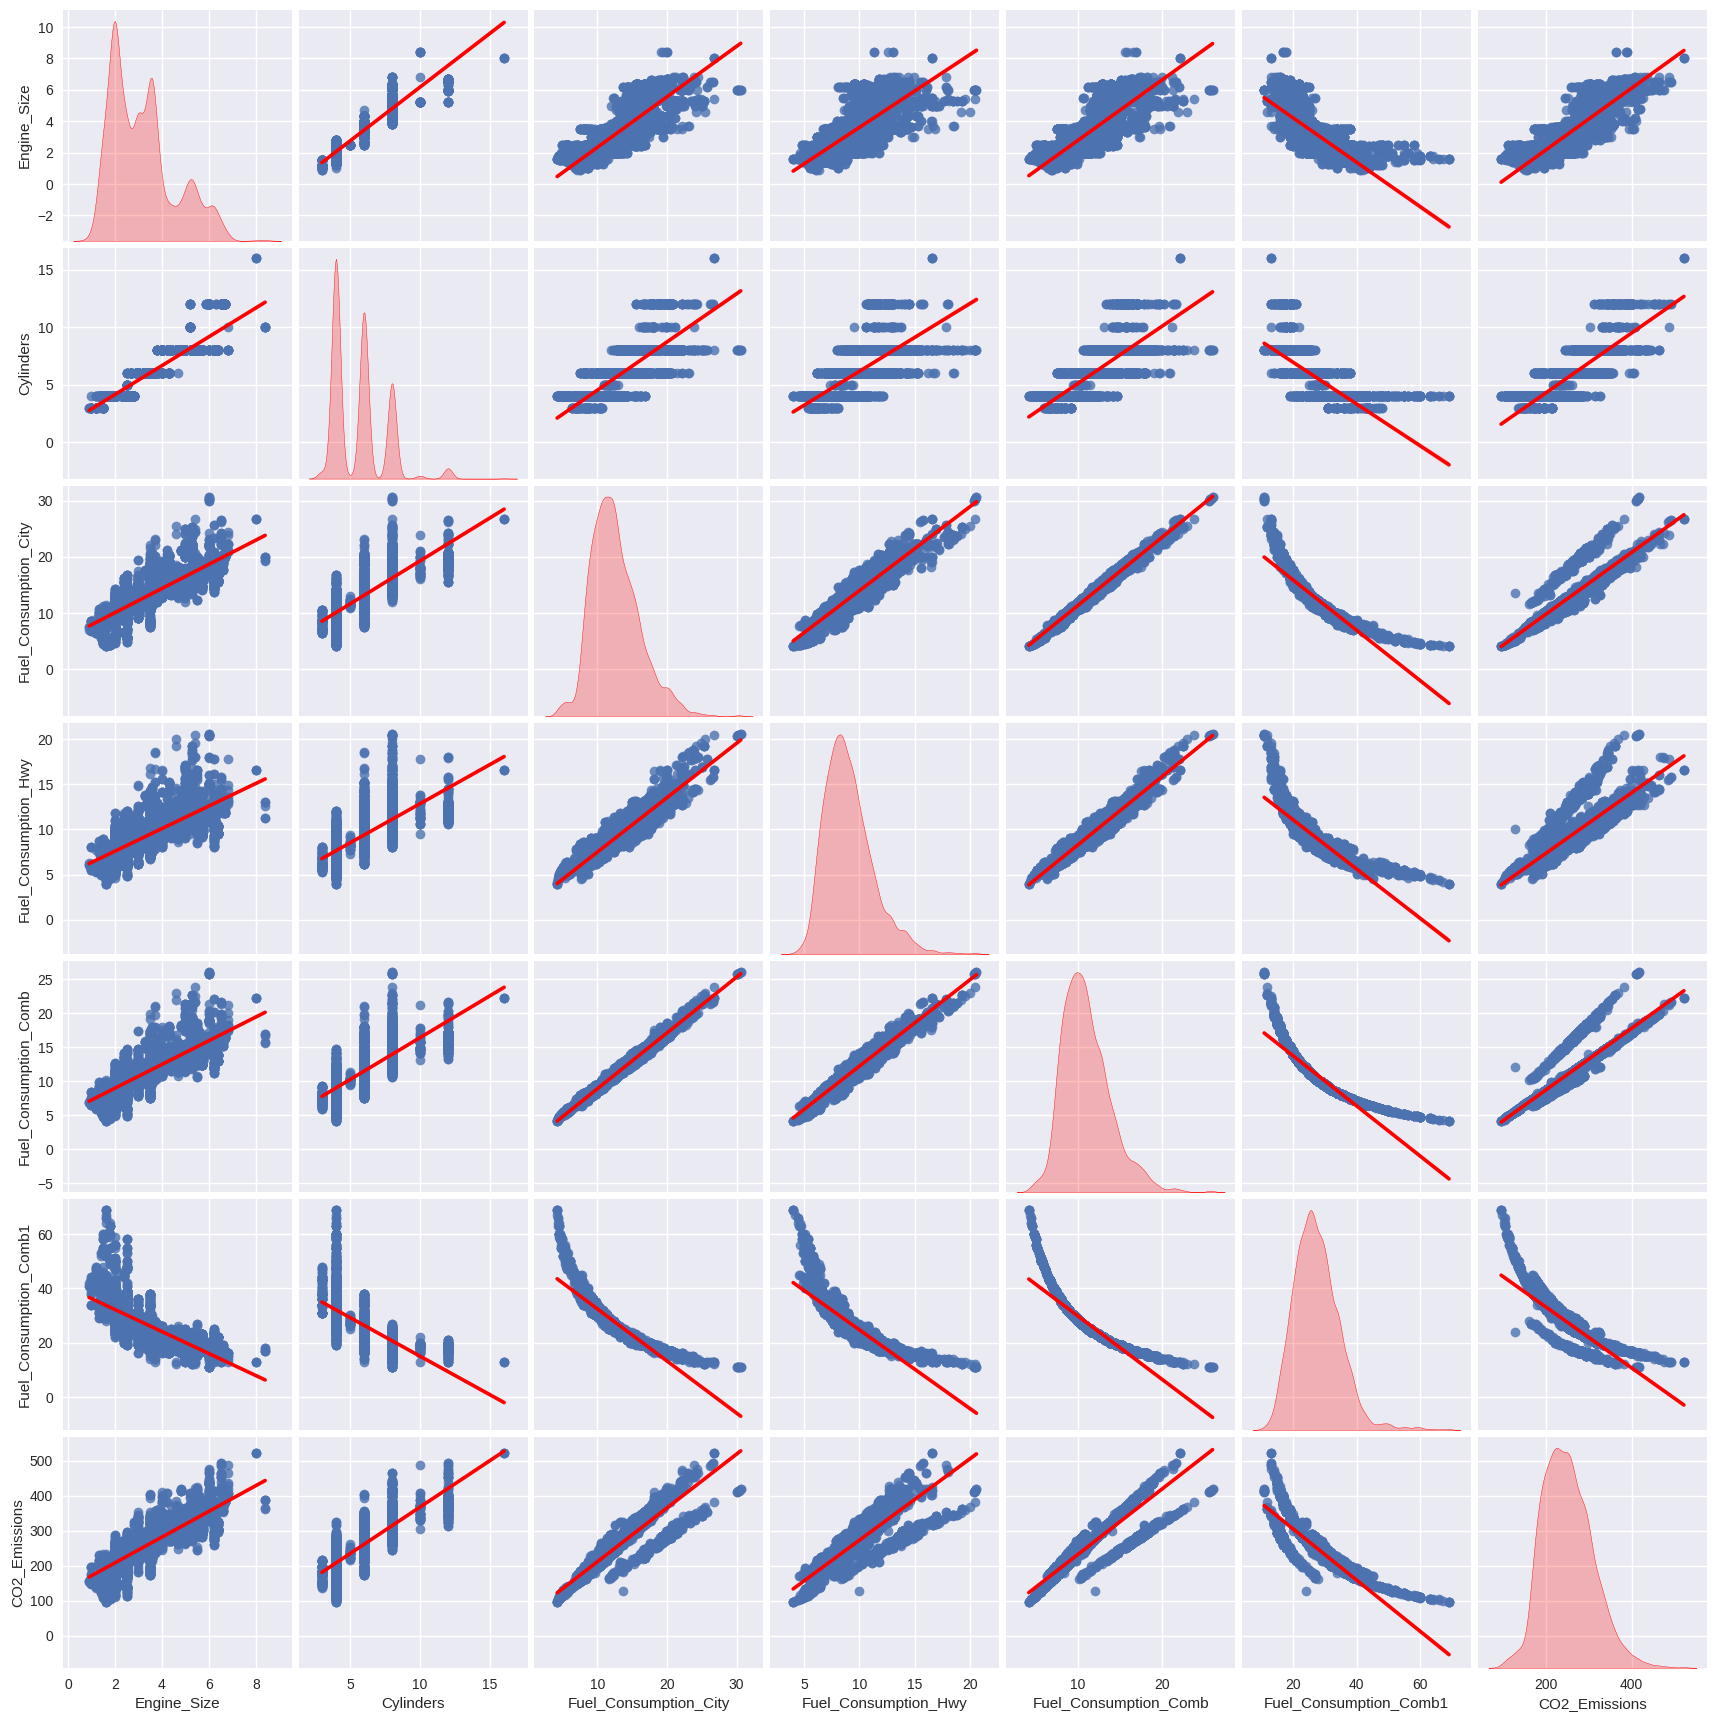

In [44]:
sns.pairplot(car_emissions, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

## Outlier Check

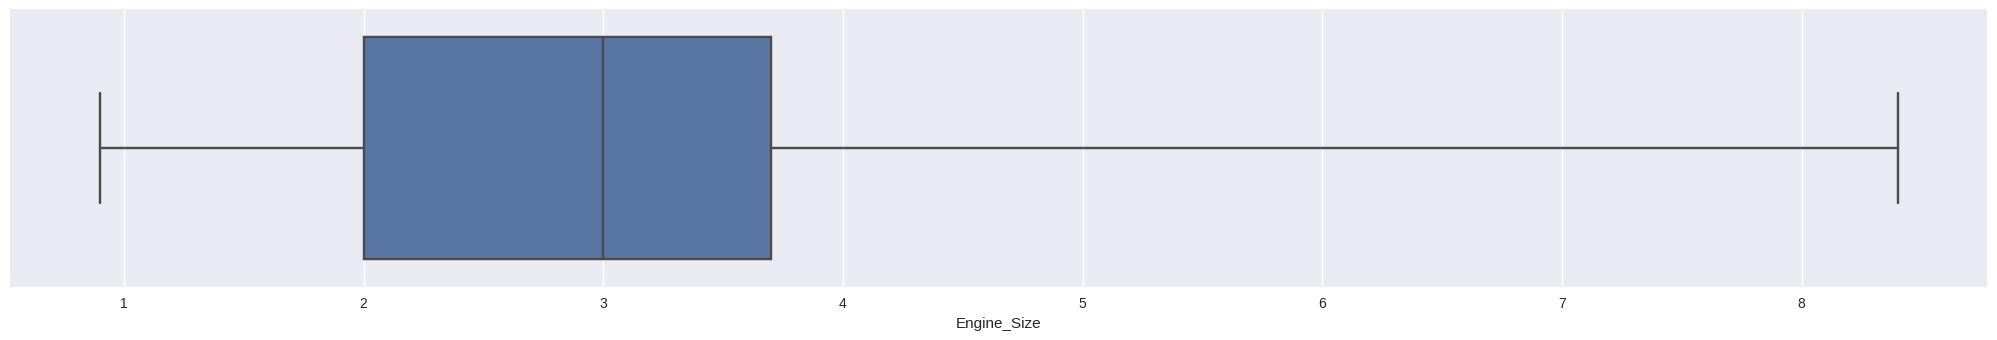

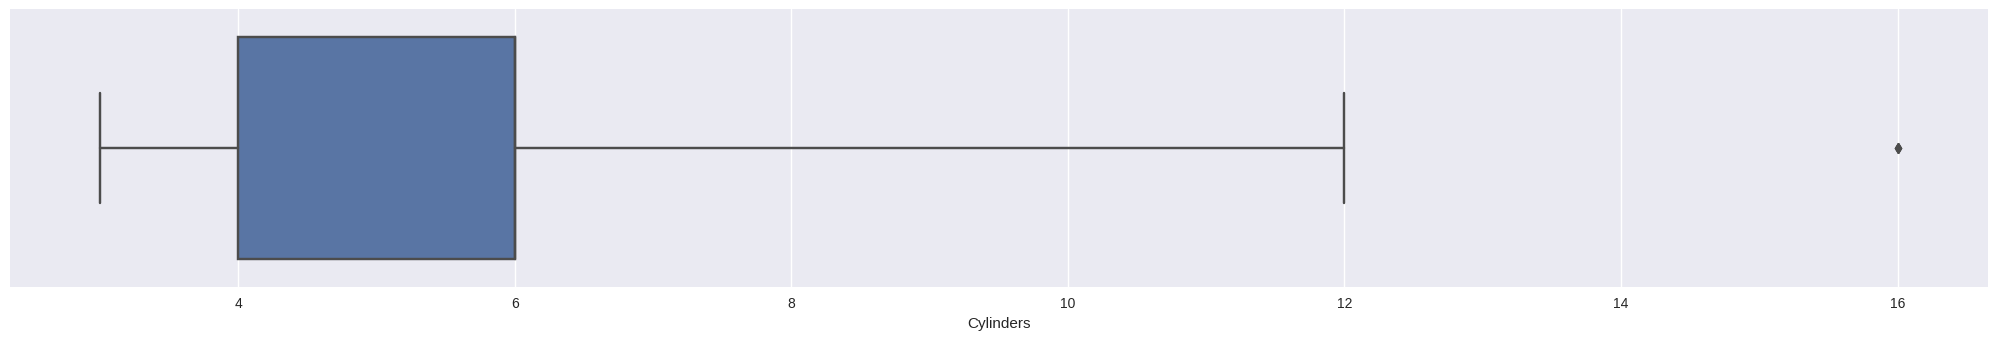

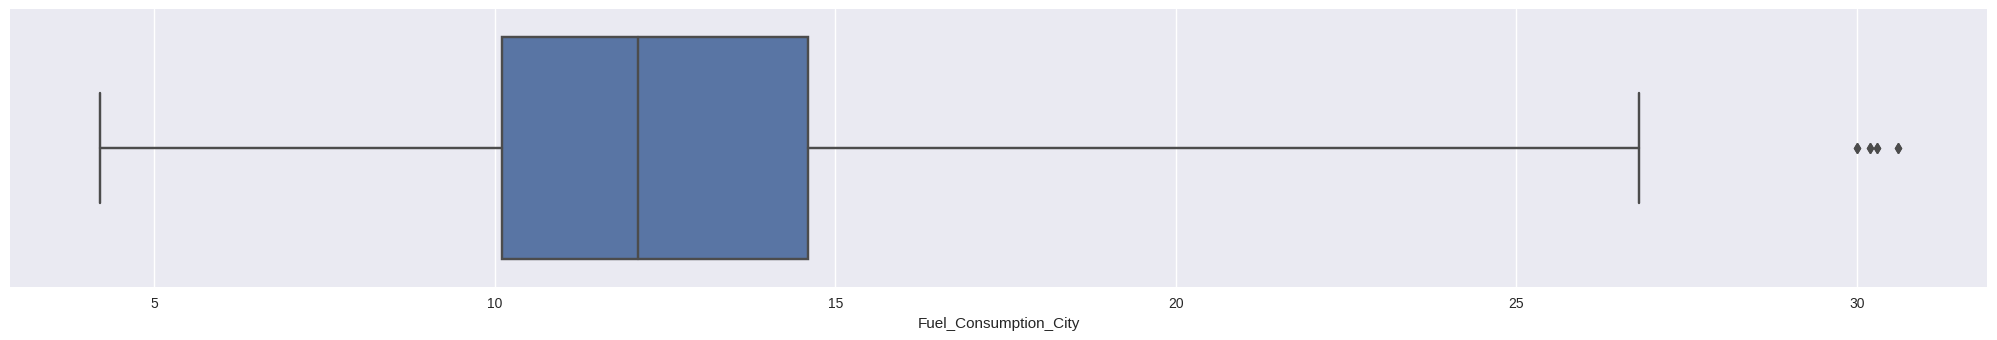

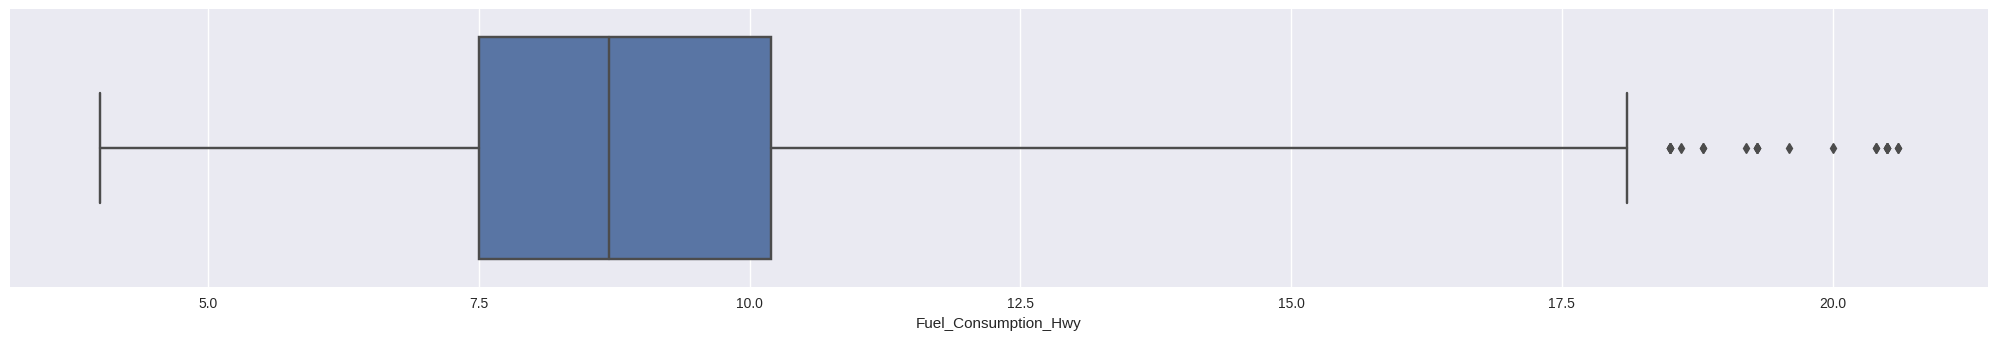

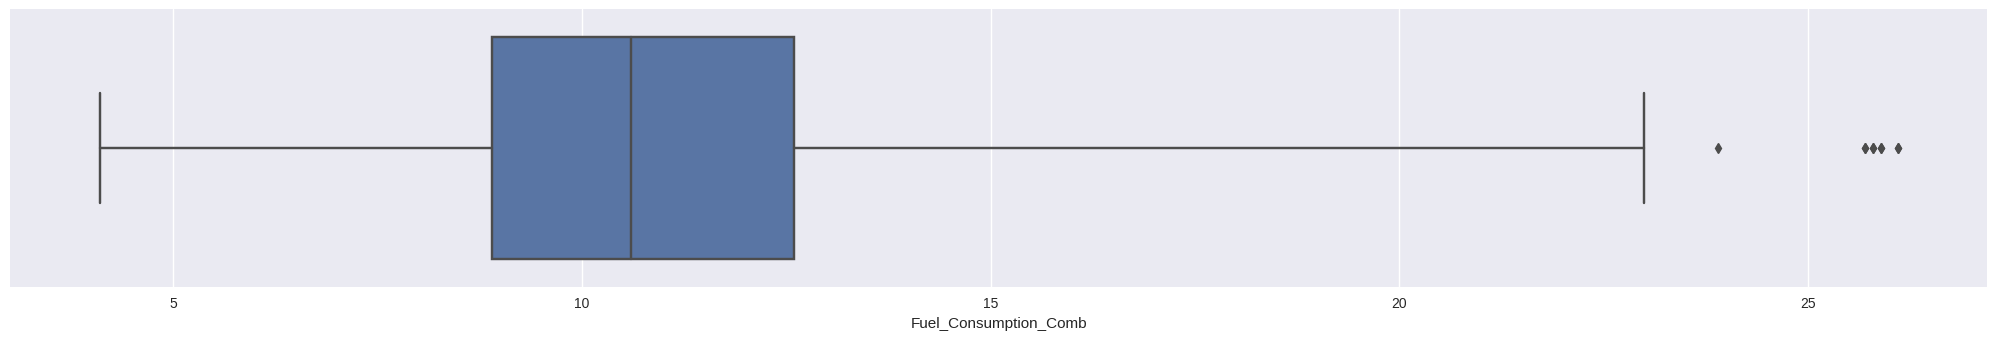

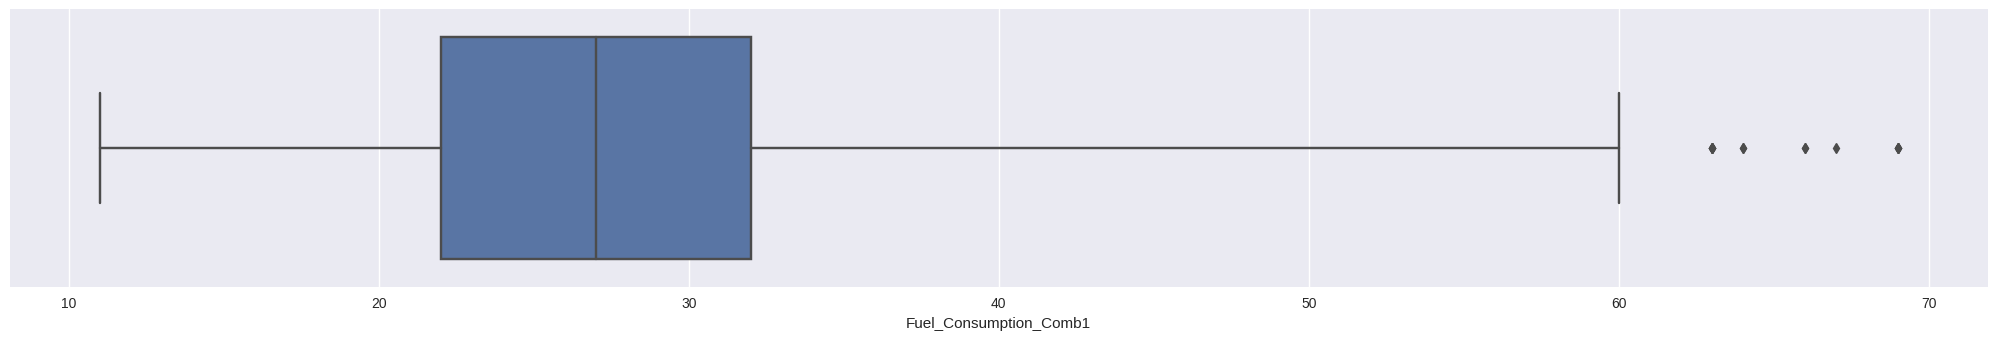

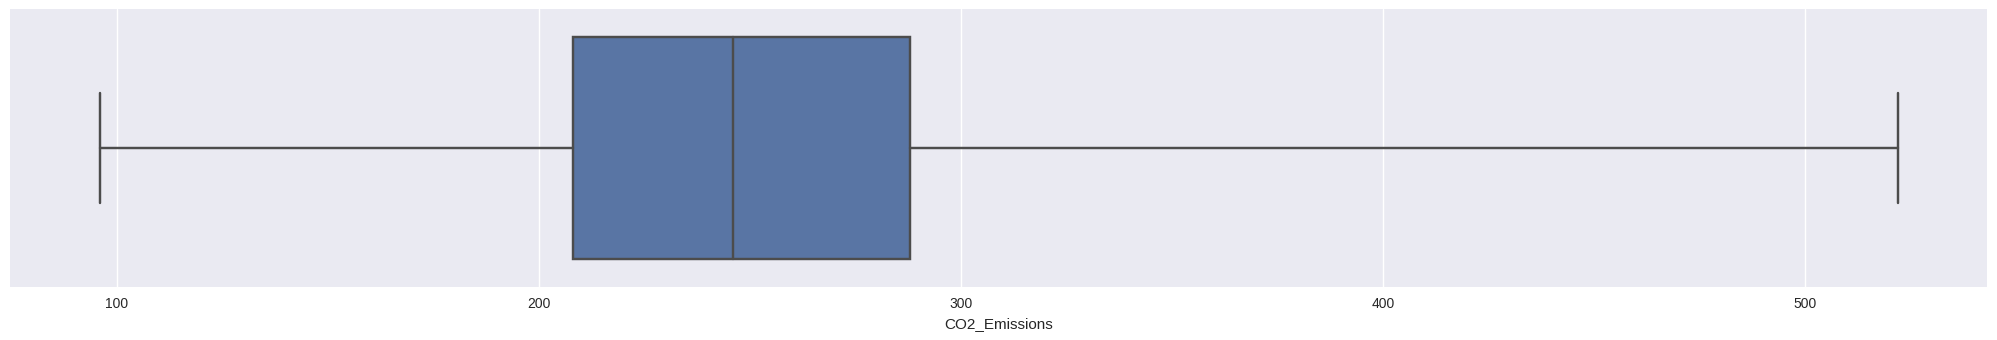

In [46]:
index=0
for feature in car_emissions.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(car_emissions.columns)),2,index)
    sns.boxplot(x=feature,data=car_emissions,whis=3)

    plt.tight_layout()

    plt.show()

Beberapa variabel numerik memiliki outliers. Akan tetapi, nantinya variabel numerik yang digunakan hanya CO2 Emissions yang tidak memiliki outliers.

#  Data Preprocessing and Data Cleaning

In [47]:
# Null Value Check
car_emissions.isna().sum()

Make                      0
Model                     0
Vehicle_Class             0
Engine_Size               0
Cylinders                 0
Transmission              0
Fuel_Type                 0
Fuel_Consumption_City     0
Fuel_Consumption_Hwy      0
Fuel_Consumption_Comb     0
Fuel_Consumption_Comb1    0
CO2_Emissions             0
dtype: int64

Tidak ada null value pada dataset

In [48]:
# Duplicated Data Check
car_emissions.duplicated().sum()

1103

Terdapat 1103 baris yang teridentifikasi duplikasi

In [91]:
# Drop Duplicated Data
car_emissions.drop_duplicates(inplace=True)

In [51]:
# Dataset Shape
car_emissions.shape

(6282, 12)

Setelah baris yang duplikat sudah dihilangkan, dataset terdiri dari 6282 baris dan 12 kolom

# Data Transformation

In [92]:
# Pisahkan tipe datanya menjadi numerical dan categorical
num_cols = car_emissions.select_dtypes(include=['float', 'int']).columns
cat_cols = car_emissions.select_dtypes(include=['object']).columns

print(f"Numerical Columns\t({len(num_cols)})\t: {list(num_cols)}")
print(f"Categorical Columns\t({len(cat_cols)})\t: {list(cat_cols)}")

Numerical Columns	(7)	: ['Engine_Size', 'Cylinders', 'Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb', 'Fuel_Consumption_Comb1', 'CO2_Emissions']
Categorical Columns	(5)	: ['Make', 'Model', 'Vehicle_Class', 'Transmission', 'Fuel_Type']


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
# Karena pada independent variable terdapat data categorical, maka akan dilakukan LabelEncoder terlebih dahulu
car_emissions_categ = car_emissions[cat_cols]
for i in cat_cols:
    Lenc = LabelEncoder()
    car_emissions_categ[i] = Lenc.fit_transform(car_emissions_categ[i])
    car_emissions[i] = car_emissions_categ[i]

<ipython-input-94-238fcfabc925>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_emissions_categ[i] = Lenc.fit_transform(car_emissions_categ[i])
<ipython-input-94-238fcfabc925>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_emissions_categ[i] = Lenc.fit_transform(car_emissions_categ[i])
<ipython-input-94-238fcfabc925>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [95]:
df = car_emissions.drop(corr["corr"][["CO2_Emissions"]].sort_values("CO2_Emissions").iloc[:1].index,axis=1)

In [96]:
df

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,232


In [97]:
# Drop kolom yang tidak dibutuhkan untuk modelling
columns_to_drop = ['Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders', 'Transmission', 'Fuel_Type', 'Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb', 'Fuel_Consumption_Comb1']
df = car_emissions.drop(columns=columns_to_drop)


In [98]:
df

,Make,CO2_Emissions
0,0,196
1,0,221
2,0,136
3,0,255
4,0,244
...,...,...
7380,41,219
7381,41,232
7382,41,240
7383,41,232


In [99]:
# Membuat kelompok berdasarkan nilai pada kolom 'Make'
grouped_df = df.groupby('Make')

# Menghitung rata-rata pada kolom 'CO2_Emissions' untuk setiap kelompok
result_df = grouped_df['CO2_Emissions'].mean().reset_index()

# Membatasi data hanya untuk rentang nilai 'Make' dari 0-41
result_df = result_df[result_df['Make'].between(0, 41)]

# Menampilkan hasil
print(result_df)

    Make  CO2_Emissions
0      0     221.666667
1      1     231.315789
2      2     344.282051
3      3     252.676806
4      4     367.914286
5      5     252.514970
6      6     522.000000
7      7     233.750000
8      8     266.141844
9      9     264.477670
10    10     244.046875
11    11     277.088889
12    12     192.285714
13    13     261.285962
14    14     282.571429
15    15     300.529412
16    16     191.262195
17    17     207.929348
18    18     254.011494
19    19     273.084746
20    20     250.795000
21    21     213.796875
22    22     402.270270
23    23     288.078947
24    24     242.124031
25    25     265.814815
26    26     318.134615
27    27     192.755906
28    28     278.717808
29    29     196.570000
30    30     200.095890
31    31     237.375587
32    32     259.192568
33    33     294.180556
34    34     388.750000
35    35     200.809524
36    36     151.428571
37    37     389.000000
38    38     218.117647
39    39     223.931159
40    40     209

# K-Means Clustering Modelling

In [100]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [101]:
print(result_df)

    Make  CO2_Emissions
0      0     221.666667
1      1     231.315789
2      2     344.282051
3      3     252.676806
4      4     367.914286
5      5     252.514970
6      6     522.000000
7      7     233.750000
8      8     266.141844
9      9     264.477670
10    10     244.046875
11    11     277.088889
12    12     192.285714
13    13     261.285962
14    14     282.571429
15    15     300.529412
16    16     191.262195
17    17     207.929348
18    18     254.011494
19    19     273.084746
20    20     250.795000
21    21     213.796875
22    22     402.270270
23    23     288.078947
24    24     242.124031
25    25     265.814815
26    26     318.134615
27    27     192.755906
28    28     278.717808
29    29     196.570000
30    30     200.095890
31    31     237.375587
32    32     259.192568
33    33     294.180556
34    34     388.750000
35    35     200.809524
36    36     151.428571
37    37     389.000000
38    38     218.117647
39    39     223.931159
40    40     209

In [102]:
# Menentukan variabel untuk clustering
X = result_df[['Make', 'CO2_Emissions']]

In [103]:
# Standardisasi variabel numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Make'])
    ],
    remainder='passthrough'
)

In [104]:
# Membangun pipeline dengan KMeans
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(random_state=42))
])

In [105]:
# Menghitung inersia untuk berbagai jumlah cluster
inertia_values = []
for k in range(1, 11):
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(X)
    inertia_values.append(pipeline.named_steps['kmeans'].inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

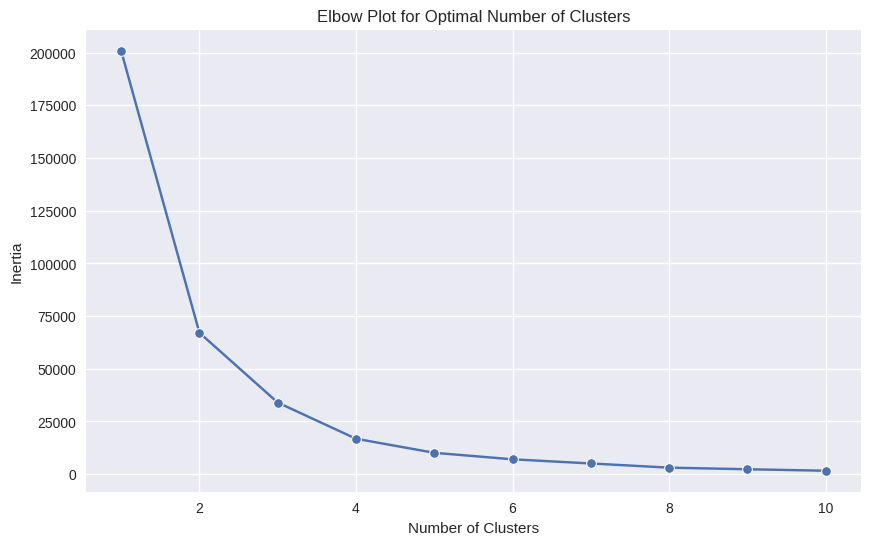

In [106]:
# Menampilkan plot elbow
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertia_values, marker='o')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [107]:
# Pilih jumlah cluster berdasarkan elbow di plot
optimal_clusters = 3

In [108]:
# Melakukan clustering dengan jumlah cluster optimal
pipeline.set_params(kmeans__n_clusters=optimal_clusters)
pipeline.fit(X)
result_df['cluster_kmeans'] = pipeline.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
# Menampilkan hasil clustering
print(result_df)

    Make  CO2_Emissions  cluster_kmeans
0      0     221.666667               0
1      1     231.315789               0
2      2     344.282051               1
3      3     252.676806               2
4      4     367.914286               1
5      5     252.514970               2
6      6     522.000000               1
7      7     233.750000               0
8      8     266.141844               2
9      9     264.477670               2
10    10     244.046875               2
11    11     277.088889               2
12    12     192.285714               0
13    13     261.285962               2
14    14     282.571429               2
15    15     300.529412               2
16    16     191.262195               0
17    17     207.929348               0
18    18     254.011494               2
19    19     273.084746               2
20    20     250.795000               2
21    21     213.796875               0
22    22     402.270270               1
23    23     288.078947               2


K-Means Clustering
0 : emisi rendah
1 : emisi tinggi
2 : emisi sedang

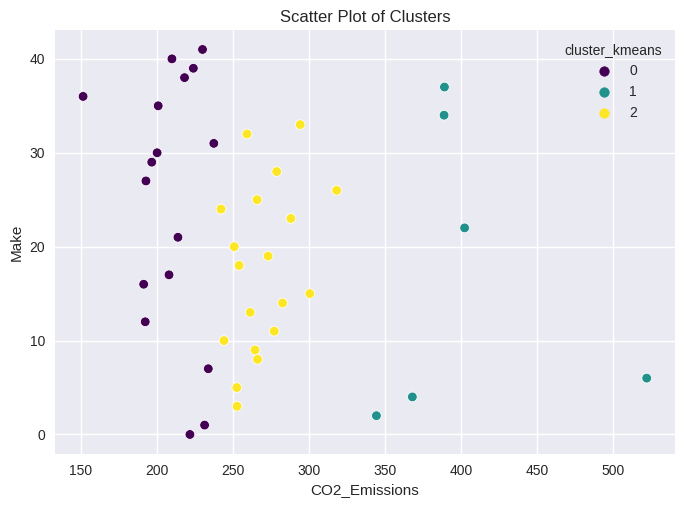

In [111]:
# Visualisasi clusters menggunakan scatter plot
sns.scatterplot(x='CO2_Emissions', y='Make', hue='cluster_kmeans', data=result_df, palette='viridis')
plt.title('Scatter Plot of Clusters')
plt.show()

## Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

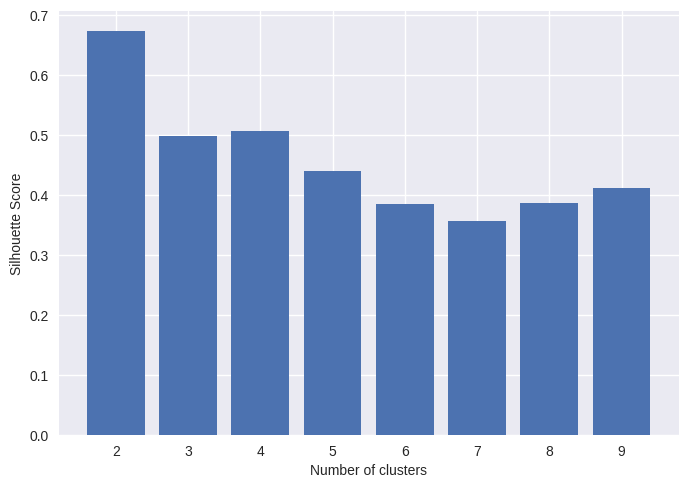

In [112]:
# Semakin tinggi nilai silhoutte maka nilai clusternya makin baik
silhouette_scores = []

for n_cluster in range(2,10):
    silhouette_scores.append(
        silhouette_score(result_df, KMeans(n_clusters = n_cluster).fit_predict(result_df)))

plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

Jumlah cluster yang paling baik adalah 2 cluster. Namun untuk keperluan interpretasi lebih lanjut dipilih 3 cluster dengan nilai silhouette score nya sebesar 0.5

# Hierarchical/Agglomerative Clustering Modelling

In [113]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns #melakukan plot variable dalam bentuk diagram batang
from sklearn.cluster import AgglomerativeClustering #untuk melakukan hierarchiral clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score #untuk mengukur kualitas cluster
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler #untuk menyeragamkan nilai data
from sklearn.decomposition import PCA #untuk reduksi fitur data sehingga bisa divisualisasi 2 dimensi
from sklearn.metrics.pairwise import cosine_similarity

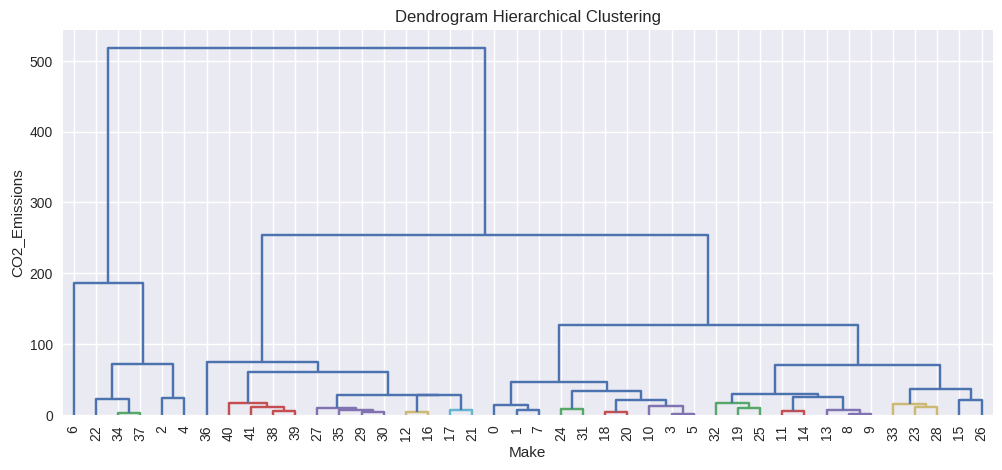

In [115]:
# Plot dendogram, menghubungkan data-data yang jaraknya dekat dalam satu cluster
plt.figure(figsize=(12,5))
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Make')
plt.ylabel('CO2_Emissions')
dendrogram(linkage(result_df,method="ward"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10)
plt.show()

Terdapat 2 cluster utama dan setelah dipecah bisa didapatkan 3 cluster akhir

In [117]:
# Agglomerative clustering dengan jumlah cluster = 3
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(result_df)
labels = agglo.labels_
hasil_agglo=pd.concat([result_df, pd.DataFrame({'cluster_hierarki':labels})], axis=1)
hasil_agglo

,Make,CO2_Emissions,cluster_kmeans,cluster_hierarki
0,0,221.666667,0,1
1,1,231.315789,0,1
2,2,344.282051,1,0
3,3,252.676806,2,1
4,4,367.914286,1,0
5,5,252.514970,2,1
6,6,522.000000,1,0
7,7,233.750000,0,1
8,8,266.141844,2,1
9,9,264.477670,2,1


Hierarchical Clustering
0 : emisi tinggi
1 : emisi sedang
2 : emisi rendah

## Model Evaluation

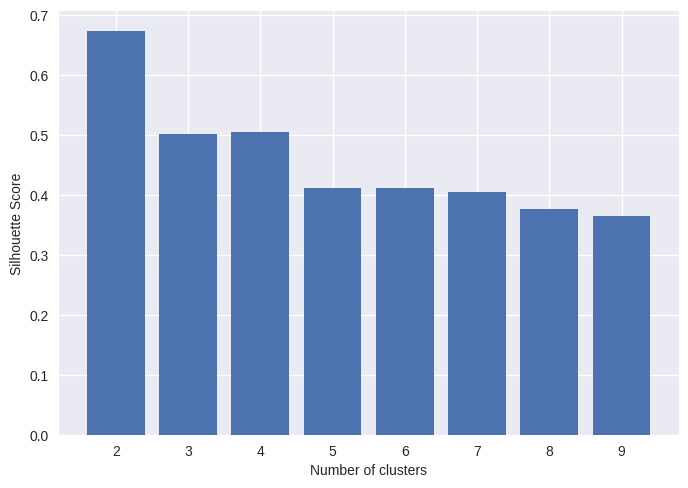

In [118]:
# Mencari jumlah cluster terbaik dengan silhouette scores, disini untuk cluster 2 hingga 10. Semakin tinggi nilai silhoutte maka nilai clusternya makin baik
silhouette_scores = []

for n_cluster in range(2,10):
    silhouette_scores.append(
        silhouette_score(result_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(result_df)))

plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

Jumlah cluster yang paling baik adalah 2 cluster. Namun untuk keperluan interpretasi lebih lanjut dipilih 3 cluster dengan nilai silhouette score nya sebesar 0.5